In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import random
print (tf.__version__)

2.18.0


In [6]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0
print('Pixels are normalized') 

Pixels are normalized


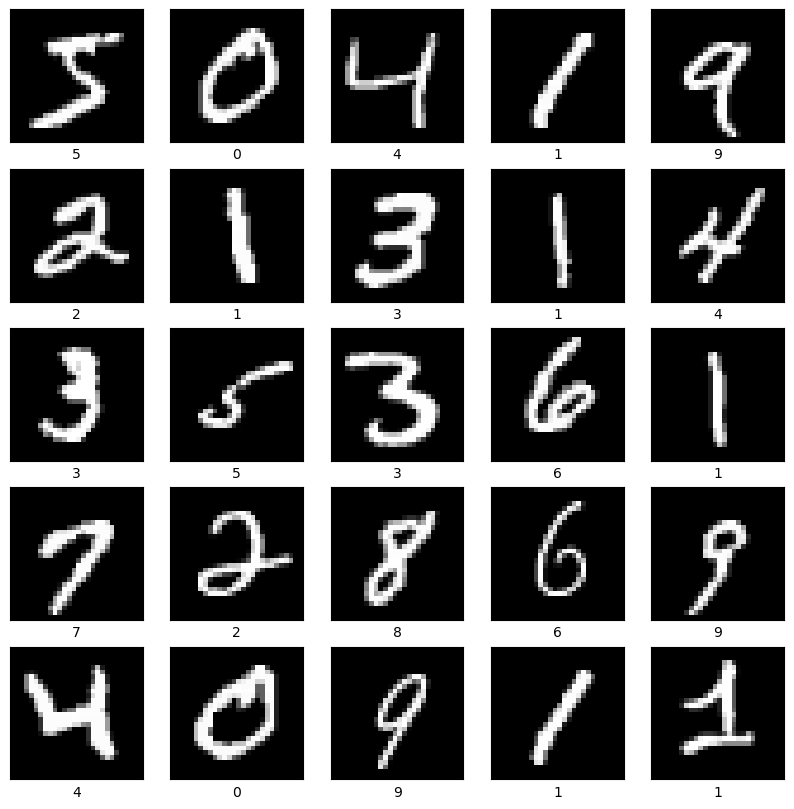

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm. gray)
    plt.xlabel(train_labels[i])
plt.show()

In [18]:
model = keras .Sequential ([
    keras.layers.InputLayer(input_shape=(28, 28)),
    keras.layers.Reshape(target_shape=(28, 28, 1)),
    keras.layers.Conv2D (filters=12, kernel_size=(3, 3), activation=tf.nn.relu),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8632 - loss: 0.5091
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9704 - loss: 0.1026
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9787 - loss: 0.0755
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9817 - loss: 0.0610
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9849 - loss: 0.0525


In [20]:
model. summary ()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_1 (Reshape)             │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 12)     │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 12)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2028)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        20,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,232 (239.19 KB)

 Trainable params: 20,410 (79.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 40,822 (159.46 KB)

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9771 - loss: 0.0709
Test accuracy: 0.9804999828338623


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


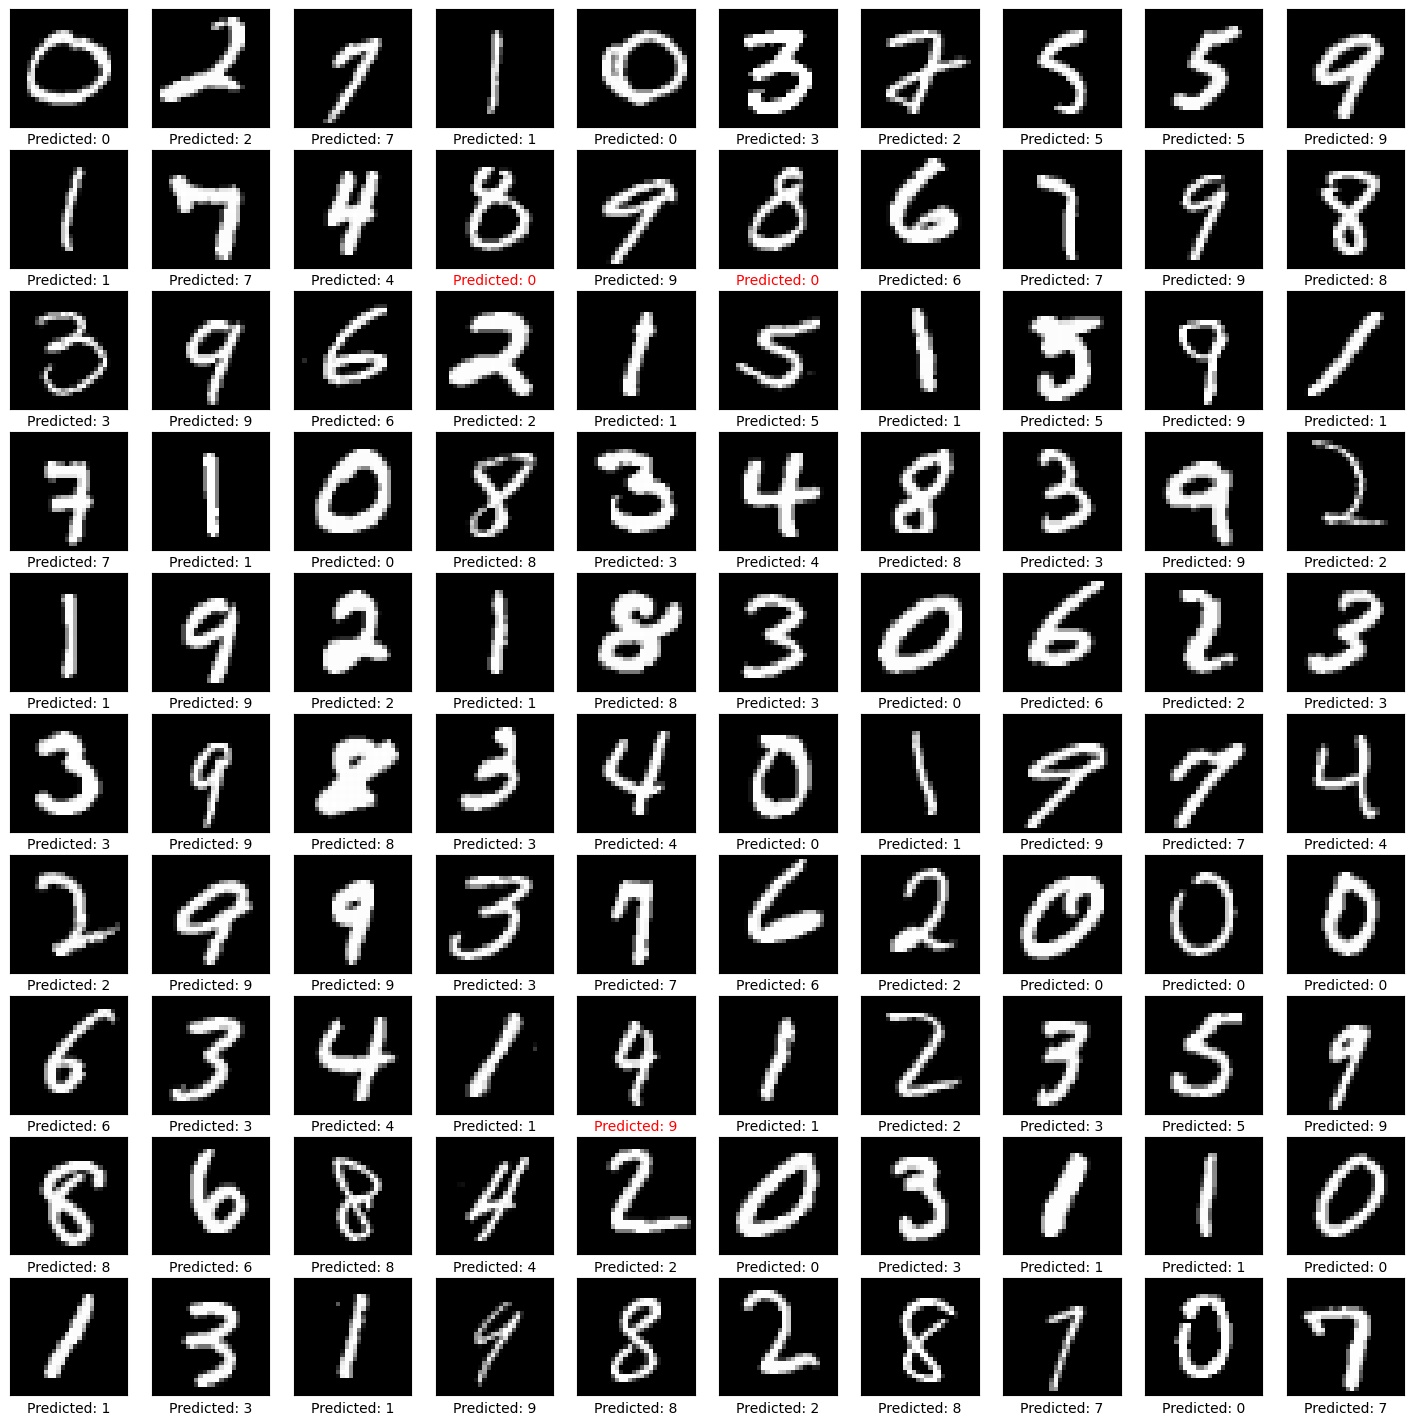

In [50]:
def get_label_color(val1, val2):
    if val1 == val2:
        return 'black'
    else:
        return 'red'
predictions = model.predict(test_images)
prediction_digits = np.argmax(predictions, axis=1)
plt.figure(figsize=(18, 18))
for i in range(100):
    ax = plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_index = random.randint(0, len(prediction_digits))
    plt.imshow(test_images[image_index], cmap=plt.cm.gray)
    ax.xaxis.label.set_color(get_label_color(prediction_digits[image_index],\
                                             test_labels[image_index] ))
    plt.xlabel('Predicted: %d' % prediction_digits[image_index])
plt.show()